In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
exp_filename = "ALU_ST_N_RUPT"

In [3]:
# Open the .res file for reading
with open(exp_filename + ".info", "r") as file:
    # Initialize an empty dictionary to store the item values
    item_values = {}

    # Read each line in the file
    for line in file:
        # Split the line into item and value
        item, value = line.strip().split(":")

        # Store the value in the dictionary with the item name as the key
        item_values[item.strip()] = float(value.strip())

# Create variables with the item names as the variable names and assign the corresponding values
for item, value in item_values.items():
    globals()[item] = value

# Print the variables
print(item_values)

{'E': 73915.0, 'Rp02': 174.325, 'Rm': 296.488, 'Au': 0.157293, 'A': -1.0, 'strain rate': -1.0, 'Kv': 5530.18, 'Km': 8723.9, 'Kt': 15106.2}


In [4]:
E = item_values["E"]
Rp02 = item_values["Rp02"]


print(E)

73915.0


In [5]:
# lecture des données traitées
res = np.genfromtxt(exp_filename + ".res")[:]
print(res.shape)

(1000, 6)


In [6]:
eps_col = 1
eps_t_col = 3
sig_col = 4
sig_t_col = 5

In [7]:
sig = res[:, sig_col]
sig

array([  8.62978526,  24.6358073 ,  40.35269343,  55.24398171,
        69.32076023,  82.67711417,  95.06433877, 106.55119627,
       117.39259716, 126.84102044, 135.17279353, 142.0043654 ,
       147.57302609, 152.23448314, 156.179829  , 159.5441227 ,
       162.31562685, 164.66765578, 166.76852055, 168.60222685,
       170.24103714, 171.75819026, 173.0442987 , 174.32474072,
       175.46723848, 176.4640915 , 177.48251821, 178.36721593,
       179.23179165, 180.04358126, 180.79786036, 181.55518263,
       182.2268746 , 182.86263234, 183.51999662, 184.11188731,
       184.68714908, 185.27813337, 185.81136463, 186.33852568,
       186.8736985 , 187.40191236, 187.89591408, 188.36862684,
       188.86273806, 189.33793796, 189.78920276, 190.20558026,
       190.68134301, 191.13422557, 191.58927485, 191.99785137,
       192.47248616, 192.8929781 , 193.27477177, 193.69124109,
       194.12447706, 194.55673899, 194.97173794, 195.36469346,
       195.71789514, 196.12459456, 196.53662208, 196.94

In [8]:
# on se limite à rm et sig > 70
sig_thresh = 00.0
id_max = np.argmax(sig)
res = res[sig > sig_thresh]
res = res[:id_max]

res

array([[0.00000000e+00, 1.16752900e-04, 0.00000000e+00, 1.16746000e-04,
        8.62978526e+00, 8.63079281e+00],
       [0.00000000e+00, 2.95255100e-04, 0.00000000e+00, 2.95211500e-04,
        2.46358073e+01, 2.46430812e+01],
       [0.00000000e+00, 4.73757400e-04, 0.00000000e+00, 4.73645200e-04,
        4.03526934e+01, 4.03718108e+01],
       ...,
       [0.00000000e+00, 1.60768786e-01, 0.00000000e+00, 1.49082532e-01,
        2.96470507e+02, 3.44133710e+02],
       [0.00000000e+00, 1.60947288e-01, 0.00000000e+00, 1.49236300e-01,
        2.96483330e+02, 3.44201518e+02],
       [0.00000000e+00, 1.61125790e-01, 0.00000000e+00, 1.49390044e-01,
        2.96481081e+02, 3.44251829e+02]])

In [9]:
# lecture des données vraies
eps_t = res[:, eps_t_col]
sig_t = res[:, sig_t_col]

eps = res[:, eps_col]
sig = res[:, sig_col]

# déformation plastique
p = eps_t - sig_t / E

In [10]:
res, sig,

(array([[0.00000000e+00, 1.16752900e-04, 0.00000000e+00, 1.16746000e-04,
         8.62978526e+00, 8.63079281e+00],
        [0.00000000e+00, 2.95255100e-04, 0.00000000e+00, 2.95211500e-04,
         2.46358073e+01, 2.46430812e+01],
        [0.00000000e+00, 4.73757400e-04, 0.00000000e+00, 4.73645200e-04,
         4.03526934e+01, 4.03718108e+01],
        ...,
        [0.00000000e+00, 1.60768786e-01, 0.00000000e+00, 1.49082532e-01,
         2.96470507e+02, 3.44133710e+02],
        [0.00000000e+00, 1.60947288e-01, 0.00000000e+00, 1.49236300e-01,
         2.96483330e+02, 3.44201518e+02],
        [0.00000000e+00, 1.61125790e-01, 0.00000000e+00, 1.49390044e-01,
         2.96481081e+02, 3.44251829e+02]]),
 array([  8.62978526,  24.6358073 ,  40.35269343,  55.24398171,
         69.32076023,  82.67711417,  95.06433877, 106.55119627,
        117.39259716, 126.84102044, 135.17279353, 142.0043654 ,
        147.57302609, 152.23448314, 156.179829  , 159.5441227 ,
        162.31562685, 164.66765578, 166

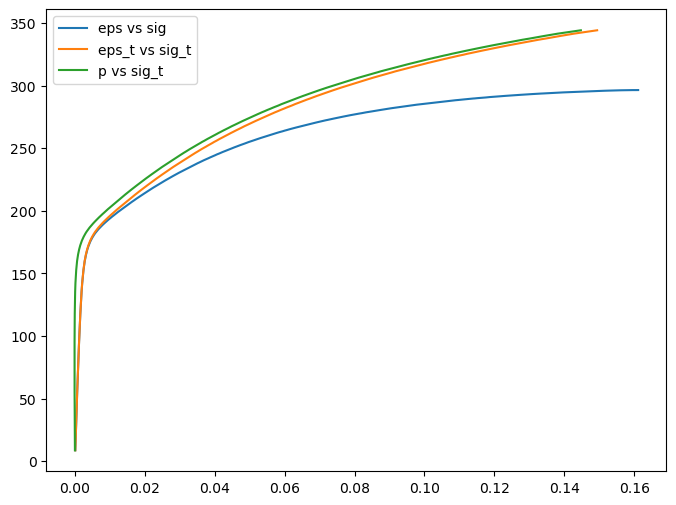

In [11]:
# Plot eps against sig
plt.figure(figsize=(8, 6))
plt.plot(eps, sig, label="eps vs sig")

# Plot eps_t against sig_t
plt.plot(eps_t, sig_t, label="eps_t vs sig_t")

# Plot p against sig_t
plt.plot(p, sig_t, label="p vs sig_t")
plt.legend()
plt.show()

Le modèle de puissance à fit est sans doute pas adapté sur tout la plage de valeur, serait pertinent de se restreindre à la partie plastique


In [12]:
# restriction de la zone de fitting du modèle à la partie plastique, au delà d'une certaine valeur du Rp02
plastic_zone = (sig > Rp02 * 1.0) & (p < 0.02)


filtered_sig_t = sig_t[plastic_zone]


filtered_eps_t = eps_t[plastic_zone]


filtered_p = p[plastic_zone]

In [13]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


def power_law(log_x, log_A, n):
    return log_A + n * log_x


def exp_power_law(x, A, n):
    return A * x**n


# log of experimental data to pass to regression model
log_filtered_p = np.log(filtered_p)
log_filtered_sig_t = np.log(filtered_sig_t)


params, params_covariance = curve_fit(
    f=power_law, xdata=log_filtered_p, ydata=log_filtered_sig_t
)

log_A = params[0]  # Convert back from log(A)
n = params[1]

print(f"log_A: {log_A}, n: {n}")

log_A: 5.824729088425939, n: 0.10913311828623513


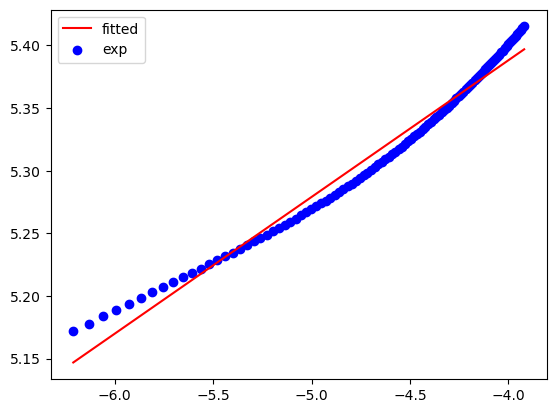

In [14]:
# fitted curve
delta_x = 200
log_xp = np.linspace(min(log_filtered_p), max(log_filtered_p), delta_x)
fitted_log_filtered_sig_t = log_A + log_xp * n

plt.plot(log_xp, fitted_log_filtered_sig_t, c="r", label="fitted")


plt.scatter(log_filtered_p, log_filtered_sig_t, c="b", label="exp")
plt.legend()


plt.show()

In [15]:
# conversion back to exponential data
A = np.exp(log_A)


x_p = np.exp(log_xp)

print(A, n)

338.5693982838616 0.10913311828623513


In [16]:
fitted_filtered_sig_t = exp_power_law(x_p, A, n)

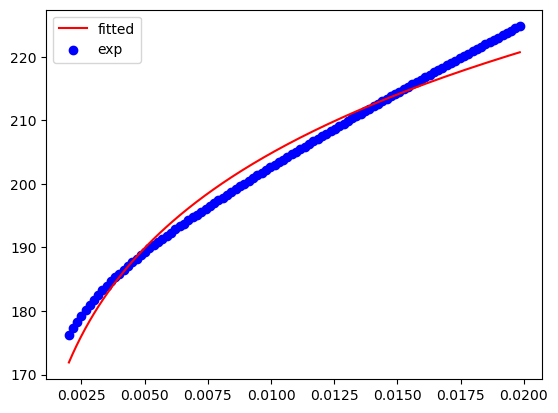

In [17]:
plt.plot(x_p, fitted_filtered_sig_t, c="r", label="fitted")
plt.scatter(filtered_p, filtered_sig_t, c="b", label="exp")
plt.legend()


plt.show()

In [18]:
# create even discretization of deformation
x_eps = np.linspace(0, max(p), delta_x)
power_law_y = exp_power_law(x_eps, A, n)

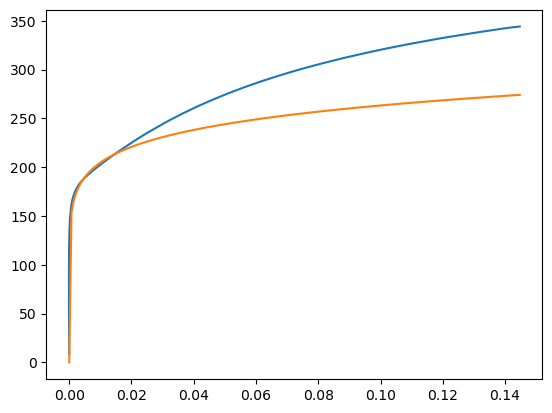

In [19]:
plt.plot(p, sig_t)
plt.plot(x_eps, power_law_y)
plt.show()

Johnson-Cook Law


In [20]:
# définition de la zone d'estimation de la loi Johnson Cook
plastic_zoneJC = (sig > Rp02 * 1.0) & (p < max(p))


def JC_law(x, A, B, n):
    return A + B * x**n


paramsJC, params_covarianceJC = curve_fit(
    f=JC_law, xdata=p[plastic_zoneJC], ydata=sig_t[plastic_zoneJC]
)

A, B, n = paramsJC[0], paramsJC[1], paramsJC[2]

C:\Users\Jules\AppData\Local\Temp\ipykernel_20780\3299449622.py:6: RuntimeWarning: overflow encountered in power
  return A + B * x**n
C:\Users\Jules\AppData\Local\Temp\ipykernel_20780\3299449622.py:6: RuntimeWarning: overflow encountered in multiply
  return A + B * x**n


In [21]:
print(A, B, n)

121.05165741171642 470.4605032133968 0.3761121815279615


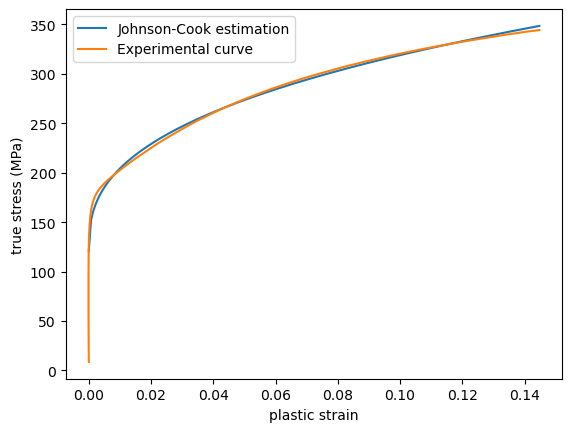

In [22]:
# JC estimation of the even discretization
sig_t_JC_x = JC_law(x_eps, A, B, n)
plt.plot(x_eps, sig_t_JC_x, label="Johnson-Cook estimation")
plt.plot(p, sig_t, label="Experimental curve")
plt.xlabel("plastic strain")
plt.ylabel("true stress (MPa)")
plt.legend()
plt.show()

C:\Users\Jules\AppData\Local\Temp\ipykernel_20780\3299449622.py:6: RuntimeWarning: invalid value encountered in power
  return A + B * x**n


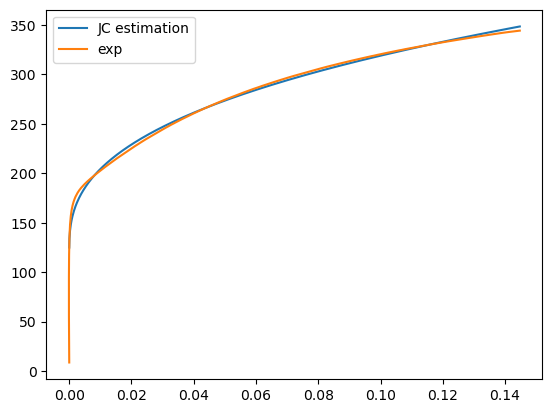

In [23]:
# estimate by JC image of palstic deformation p
sig_t_JC_p = JC_law(p, A, B, n)
plt.plot(p, sig_t_JC_p, label="JC estimation")
plt.plot(p, sig_t, label="exp")
plt.legend()
plt.show()

In [24]:
# Calculate the R-squared score
r_squared = r2_score(sig_t[plastic_zoneJC], sig_t_JC_p[plastic_zoneJC])

print(f"R-squared: {r_squared}")

R-squared: 0.9971990856479491


### Save results into txt file


In [25]:
infos = []
infos.append("A: %g" % (A))
infos.append("B: %g" % (B))
infos.append("n: %g" % (n))
infos.append("r2: %g" % (r_squared))

fic = open(exp_filename + "-identification.info", "w")
for info in infos:
    fic.writelines(info + "\n")
fic.close()

# ~ Si on veut lire l'ensemble du fichier il suffit d'ouvrir le fichier en lecture comme suit :
f = open(exp_filename + "-identification.info", "r")
infos = f.read()
f.close
print(infos)

A: 121.052
B: 470.461
n: 0.376112
r2: 0.997199

